In [34]:
#Импорт библиотек

In [35]:
import pandas as pd
import numpy as np 
import sklearn 
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.decomposition  import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import Pipeline

In [36]:
#Чтение и анализ данных

In [37]:
df = pd.read_excel('C:/BST_DataSet.xlsx')
df

,Unnamed: 0,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",Unnamed: 12,Unnamed: 13,Unnamed: 14
0,2011-01-01,-79049.0,5.244667,7.75,2.90,4.50,96.29,106.171510,5.532900e+06,19307.700000,30.08,20669,NaN,NaN,NaN
1,2011-02-01,180475.0,5.144211,8.00,3.10,4.40,103.96,106.999640,5.613700e+06,19536.700000,29.29,20680,NaN,NaN,NaN
2,2011-03-01,106845.0,5.021364,8.00,3.10,4.20,114.44,107.663040,5.647000e+06,19788.700000,28.43,22673,NaN,NaN,NaN
3,2011-04-01,224890.0,4.558571,8.00,2.60,4.10,123.15,108.125990,5.863400e+06,20020.800000,28.10,22519,NaN,NaN,NaN
4,2011-05-01,45856.0,4.795000,8.25,2.60,4.10,114.46,108.645000,5.893400e+06,20160.900000,27.87,22779,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2017-08-01,NaN,7.882174,9.00,0.73,6.07,52.00,168.418880,9.194600e+06,39419.300000,59.65,37099,NaN,NaN,NaN
80,2017-09-01,NaN,7.648095,8.50,0.66,5.31,57.00,168.166250,9.225200e+06,39571.000000,57.73,38047,NaN,NaN,NaN
81,2017-10-01,NaN,7.503636,8.25,0.61,5.67,57.50,168.502590,9.246600e+06,39565.982237,57.71,38333,NaN,NaN,NaN
82,2017-11-01,NaN,7.381429,8.25,0.64,5.18,63.10,168.852459,9.281212e+06,40101.582544,58.92,38848,NaN,NaN,NaN


In [38]:
df_copy =  df.copy(deep=True)
df_copy

,Unnamed: 0,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",Unnamed: 12,Unnamed: 13,Unnamed: 14
0,2011-01-01,-79049.0,5.244667,7.75,2.90,4.50,96.29,106.171510,5.532900e+06,19307.700000,30.08,20669,NaN,NaN,NaN
1,2011-02-01,180475.0,5.144211,8.00,3.10,4.40,103.96,106.999640,5.613700e+06,19536.700000,29.29,20680,NaN,NaN,NaN
2,2011-03-01,106845.0,5.021364,8.00,3.10,4.20,114.44,107.663040,5.647000e+06,19788.700000,28.43,22673,NaN,NaN,NaN
3,2011-04-01,224890.0,4.558571,8.00,2.60,4.10,123.15,108.125990,5.863400e+06,20020.800000,28.10,22519,NaN,NaN,NaN
4,2011-05-01,45856.0,4.795000,8.25,2.60,4.10,114.46,108.645000,5.893400e+06,20160.900000,27.87,22779,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2017-08-01,NaN,7.882174,9.00,0.73,6.07,52.00,168.418880,9.194600e+06,39419.300000,59.65,37099,NaN,NaN,NaN
80,2017-09-01,NaN,7.648095,8.50,0.66,5.31,57.00,168.166250,9.225200e+06,39571.000000,57.73,38047,NaN,NaN,NaN
81,2017-10-01,NaN,7.503636,8.25,0.61,5.67,57.50,168.502590,9.246600e+06,39565.982237,57.71,38333,NaN,NaN,NaN
82,2017-11-01,NaN,7.381429,8.25,0.64,5.18,63.10,168.852459,9.281212e+06,40101.582544,58.92,38848,NaN,NaN,NaN


In [39]:
df.columns

Index(['Unnamed: 0', 'Прирост вкладов физических лиц в рублях (млн руб)',
       'Доходность ОФЗ по сроку до 1 года', 'Ключевая ставка',
       'Ставка по вкладам в долларах до 1 года',
       'Ставка по вкладам в рублях до 1 года', 'Нефть марки Юралс, долл./барр',
       'Индекс потребительских цен, ед.', 'М0, руб', 'М2, руб',
       'Курс доллара к рублю, руб', 'Номинальная средняя з/п, руб',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Unnamed: 0                                         84 non-null     datetime64[ns]
 1   Прирост вкладов физических лиц в рублях (млн руб)  72 non-null     float64       
 2   Доходность ОФЗ по сроку до 1 года                  84 non-null     float64       
 3   Ключевая ставка                                    84 non-null     float64       
 4   Ставка по вкладам в долларах до 1 года             84 non-null     float64       
 5   Ставка по вкладам в рублях до 1 года               84 non-null     float64       
 6   Нефть марки Юралс, долл./барр                      84 non-null     float64       
 7   Индекс потребительских цен, ед.                    84 non-null     float64       
 8   М0, руб               

In [41]:
#Удалим пустые столбцы 

In [42]:
df = df.drop('Unnamed: 12', axis = 1)
df = df.drop('Unnamed: 13', axis = 1)
df = df.drop('Unnamed: 14', axis = 1)
df

,Unnamed: 0,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
0,2011-01-01,-79049.0,5.244667,7.75,2.90,4.50,96.29,106.171510,5.532900e+06,19307.700000,30.08,20669
1,2011-02-01,180475.0,5.144211,8.00,3.10,4.40,103.96,106.999640,5.613700e+06,19536.700000,29.29,20680
2,2011-03-01,106845.0,5.021364,8.00,3.10,4.20,114.44,107.663040,5.647000e+06,19788.700000,28.43,22673
3,2011-04-01,224890.0,4.558571,8.00,2.60,4.10,123.15,108.125990,5.863400e+06,20020.800000,28.10,22519
4,2011-05-01,45856.0,4.795000,8.25,2.60,4.10,114.46,108.645000,5.893400e+06,20160.900000,27.87,22779
...,...,...,...,...,...,...,...,...,...,...,...,...
79,2017-08-01,NaN,7.882174,9.00,0.73,6.07,52.00,168.418880,9.194600e+06,39419.300000,59.65,37099
80,2017-09-01,NaN,7.648095,8.50,0.66,5.31,57.00,168.166250,9.225200e+06,39571.000000,57.73,38047
81,2017-10-01,NaN,7.503636,8.25,0.61,5.67,57.50,168.502590,9.246600e+06,39565.982237,57.71,38333
82,2017-11-01,NaN,7.381429,8.25,0.64,5.18,63.10,168.852459,9.281212e+06,40101.582544,58.92,38848


In [43]:
feature_names = df.columns.tolist() 
for column in feature_names: 
    print(column) 
    print(df[column].value_counts(dropna=False))

Unnamed: 0
2016-05-01    1
2012-06-01    1
2017-09-01    1
2016-11-01    1
2015-03-01    1
             ..
2012-09-01    1
2016-01-01    1
2014-05-01    1
2014-06-01    1
2016-07-01    1
Name: Unnamed: 0, Length: 84, dtype: int64
Прирост вкладов физических лиц в рублях (млн руб)
 NaN         12
 889085.0     1
 98589.0      1
 75169.0      1
 17145.0      1
             ..
 269297.0     1
 77197.0      1
 20272.0      1
-454791.0     1
 96407.0      1
Name: Прирост вкладов физических лиц в рублях (млн руб), Length: 73, dtype: int64
Доходность ОФЗ по сроку до 1 года
10.427222    1
6.481613     1
10.308889    1
4.795000     1
8.596667     1
            ..
6.929333     1
9.701905     1
6.078571     1
8.987727     1
6.349048     1
Name: Доходность ОФЗ по сроку до 1 года, Length: 84, dtype: int64
Ключевая ставка
8.25     21
8.00     16
11.00    10
10.00     6
5.50      6
9.00      3
10.50     3
7.50      3
14.00     2
17.00     2
7.75      2
9.75      2
11.50     2
12.50     1
15.00     1
8

In [44]:
df.describe()

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
count,7.200000e+01,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,8.400000e+01,84.000000,84.000000,84.000000
mean,1.466405e+05,7.875670,9.130952,2.184643,6.233929,83.118095,136.725747,7.806555e+06,30105.740071,45.288690,31877.130952
std,2.593857e+05,2.195040,2.214233,1.108624,1.733394,30.069987,22.413867,9.703699e+05,6038.007629,15.539177,6029.179510
min,-5.674480e+05,4.558571,5.500000,0.520000,4.000000,30.800000,106.171510,5.532900e+06,19307.700000,27.870000,20669.000000
25%,1.949025e+04,6.228064,8.000000,1.510000,5.292500,51.992500,116.118345,7.139175e+06,24456.950000,31.345000,26830.750000
50%,1.129245e+05,7.475455,8.250000,2.230000,5.755000,99.630000,131.183355,7.959500e+06,30155.450000,35.885000,32355.500000
75%,2.360528e+05,9.332238,10.125000,2.900000,6.657500,110.185000,160.386900,8.462600e+06,35124.050000,59.742500,35772.500000
max,1.034556e+06,15.098421,17.000000,5.220000,12.330000,124.930000,169.560950,9.974472e+06,42372.101217,77.220000,50500.000000


In [45]:
#Построение графиков распределения данных

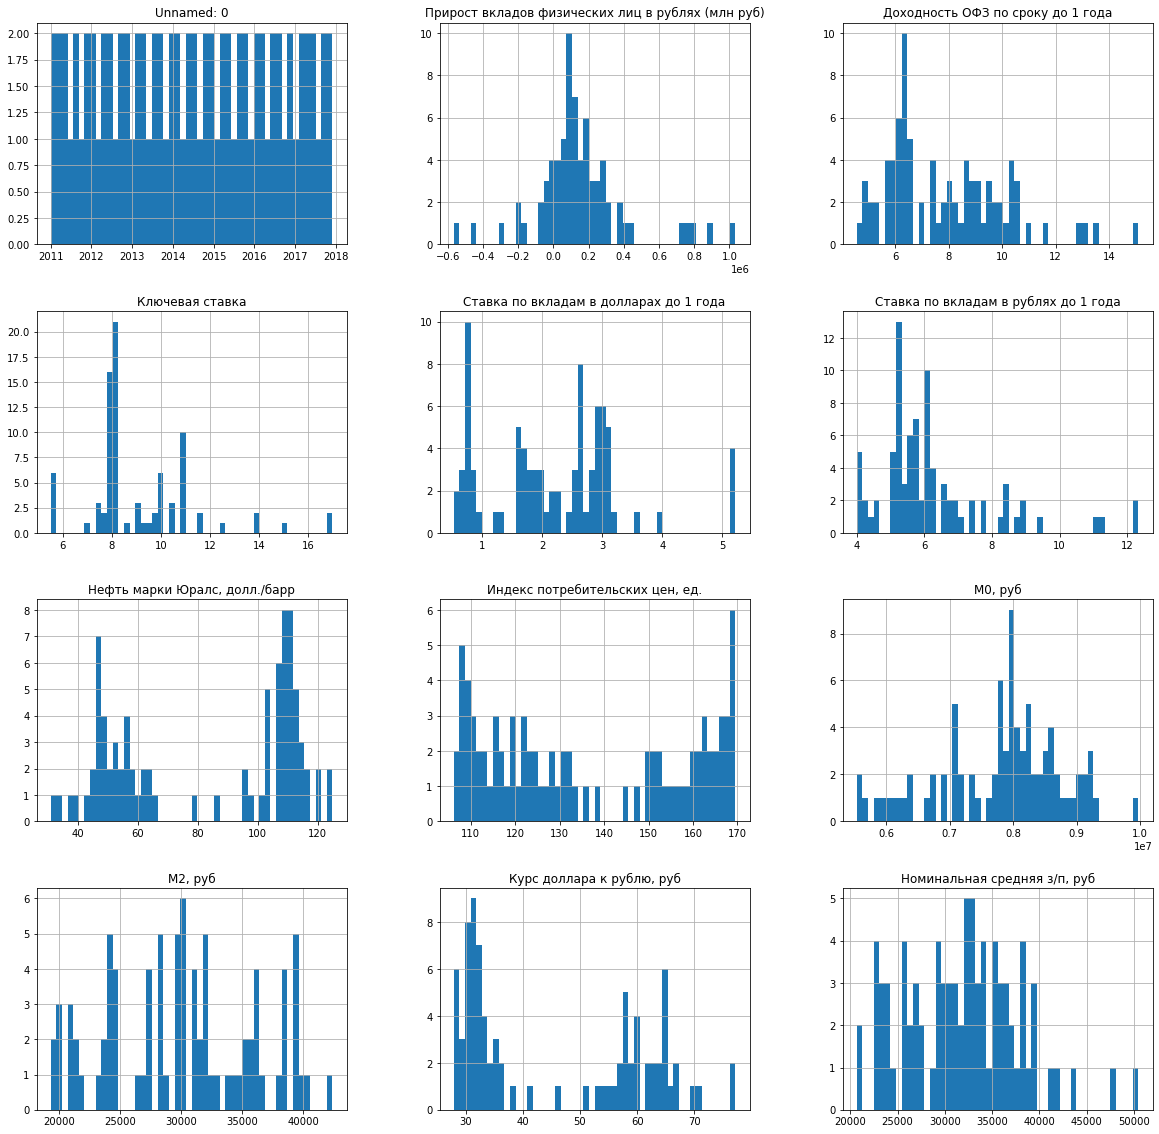

In [46]:
df.hist(bins=50, figsize=(20,20))
plt.show()

In [47]:
#Построение корреляционной матрицы

In [48]:
corr_matrix = df.corr()
corr_matrix['Прирост вкладов физических лиц в рублях (млн руб)'].sort_values()

Нефть марки Юралс, долл./барр                       -0.077074
Ставка по вкладам в долларах до 1 года              -0.012823
Доходность ОФЗ по сроку до 1 года                    0.001829
Ключевая ставка                                      0.048946
Ставка по вкладам в рублях до 1 года                 0.053989
Курс доллара к рублю, руб                            0.077381
Индекс потребительских цен, ед.                      0.098694
М2, руб                                              0.135086
М0, руб                                              0.160956
Номинальная средняя з/п, руб                         0.405291
Прирост вкладов физических лиц в рублях (млн руб)    1.000000
Name: Прирост вкладов физических лиц в рублях (млн руб), dtype: float64

In [49]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
Прирост вкладов физических лиц в рублях (млн руб),1.000000,0.001829,0.048946,-0.012823,0.053989,-0.077074,0.098694,0.160956,0.135086,0.077381,0.405291
Доходность ОФЗ по сроку до 1 года,0.001829,1.000000,0.867788,0.068171,0.906353,-0.776375,0.666987,0.556461,0.568608,0.788937,0.543822
Ключевая ставка,0.048946,0.867788,1.000000,0.296126,0.897624,-0.677511,0.489410,0.278982,0.334691,0.666175,0.337057
Ставка по вкладам в долларах до 1 года,-0.012823,0.068171,0.296126,1.000000,0.351984,0.423982,-0.611373,-0.548334,-0.652370,-0.425812,-0.514895
Ставка по вкладам в рублях до 1 года,0.053989,0.906353,0.897624,0.351984,1.000000,-0.624833,0.473912,0.401135,0.384467,0.635224,0.405700
"Нефть марки Юралс, долл./барр",-0.077074,-0.776375,-0.677511,0.423982,-0.624833,1.000000,-0.926264,-0.684542,-0.814653,-0.983385,-0.711333
"Индекс потребительских цен, ед.",0.098694,0.666987,0.489410,-0.611373,0.473912,-0.926264,1.000000,0.854735,0.961211,0.926945,0.839043
"М0, руб",0.160956,0.556461,0.278982,-0.548334,0.401135,-0.684542,0.854735,1.000000,0.952261,0.702459,0.927499
"М2, руб",0.135086,0.568608,0.334691,-0.652370,0.384467,-0.814653,0.961211,0.952261,1.000000,0.822308,0.904622
"Курс доллара к рублю, руб",0.077381,0.788937,0.666175,-0.425812,0.635224,-0.983385,0.926945,0.702459,0.822308,1.000000,0.718904


In [50]:
#После анализа имеющихся данных было решено добавить столбец с месяцем и годом

In [51]:
df['month'] = pd.to_datetime(df['Unnamed: 0']).dt.month
df['year'] = pd.to_datetime(df['Unnamed: 0']).dt.year
df = df.drop('Unnamed: 0', axis = 1)
df

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",month,year
0,-79049.0,5.244667,7.75,2.90,4.50,96.29,106.171510,5.532900e+06,19307.700000,30.08,20669,1,2011
1,180475.0,5.144211,8.00,3.10,4.40,103.96,106.999640,5.613700e+06,19536.700000,29.29,20680,2,2011
2,106845.0,5.021364,8.00,3.10,4.20,114.44,107.663040,5.647000e+06,19788.700000,28.43,22673,3,2011
3,224890.0,4.558571,8.00,2.60,4.10,123.15,108.125990,5.863400e+06,20020.800000,28.10,22519,4,2011
4,45856.0,4.795000,8.25,2.60,4.10,114.46,108.645000,5.893400e+06,20160.900000,27.87,22779,5,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,NaN,7.882174,9.00,0.73,6.07,52.00,168.418880,9.194600e+06,39419.300000,59.65,37099,8,2017
80,NaN,7.648095,8.50,0.66,5.31,57.00,168.166250,9.225200e+06,39571.000000,57.73,38047,9,2017
81,NaN,7.503636,8.25,0.61,5.67,57.50,168.502590,9.246600e+06,39565.982237,57.71,38333,10,2017
82,NaN,7.381429,8.25,0.64,5.18,63.10,168.852459,9.281212e+06,40101.582544,58.92,38848,11,2017


In [52]:
#Самыми коррелирующими с таргетом признаками являются: Номинальная средняя з/п, руб; М0, руб; М2, руб

In [53]:
df_dummy = pd.get_dummies(df, columns=['month', 'year'])
df_dummy

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб",...,month_10,month_11,month_12,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017
0,-79049.0,5.244667,7.75,2.90,4.50,96.29,106.171510,5.532900e+06,19307.700000,30.08,...,0,0,0,1,0,0,0,0,0,0
1,180475.0,5.144211,8.00,3.10,4.40,103.96,106.999640,5.613700e+06,19536.700000,29.29,...,0,0,0,1,0,0,0,0,0,0
2,106845.0,5.021364,8.00,3.10,4.20,114.44,107.663040,5.647000e+06,19788.700000,28.43,...,0,0,0,1,0,0,0,0,0,0
3,224890.0,4.558571,8.00,2.60,4.10,123.15,108.125990,5.863400e+06,20020.800000,28.10,...,0,0,0,1,0,0,0,0,0,0
4,45856.0,4.795000,8.25,2.60,4.10,114.46,108.645000,5.893400e+06,20160.900000,27.87,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,NaN,7.882174,9.00,0.73,6.07,52.00,168.418880,9.194600e+06,39419.300000,59.65,...,0,0,0,0,0,0,0,0,0,1
80,NaN,7.648095,8.50,0.66,5.31,57.00,168.166250,9.225200e+06,39571.000000,57.73,...,0,0,0,0,0,0,0,0,0,1
81,NaN,7.503636,8.25,0.61,5.67,57.50,168.502590,9.246600e+06,39565.982237,57.71,...,1,0,0,0,0,0,0,0,0,1
82,NaN,7.381429,8.25,0.64,5.18,63.10,168.852459,9.281212e+06,40101.582544,58.92,...,0,1,0,0,0,0,0,0,0,1


In [54]:
#Формирование обучающей и тестовой выборки

In [55]:
train = df_dummy.iloc[:72, :]
test = df_dummy.iloc[72:, :]
train

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб",...,month_10,month_11,month_12,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017
0,-79049.0,5.244667,7.75,2.90,4.50,96.29,106.17151,5532900.0,19307.7,30.08,...,0,0,0,1,0,0,0,0,0,0
1,180475.0,5.144211,8.00,3.10,4.40,103.96,106.99964,5613700.0,19536.7,29.29,...,0,0,0,1,0,0,0,0,0,0
2,106845.0,5.021364,8.00,3.10,4.20,114.44,107.66304,5647000.0,19788.7,28.43,...,0,0,0,1,0,0,0,0,0,0
3,224890.0,4.558571,8.00,2.60,4.10,123.15,108.12599,5863400.0,20020.8,28.10,...,0,0,0,1,0,0,0,0,0,0
4,45856.0,4.795000,8.25,2.60,4.10,114.46,108.64500,5893400.0,20160.9,27.87,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,92168.0,9.274348,10.50,0.89,6.77,46.14,163.04897,8517600.0,36169.6,64.92,...,0,0,0,0,0,0,0,0,1,0
68,20272.0,9.015000,10.00,0.82,6.00,46.19,163.32615,8557800.0,36148.8,64.60,...,0,0,0,0,0,0,0,0,1,0
69,72037.0,9.002381,10.00,0.71,6.01,49.73,164.02846,8459500.0,36051.0,62.68,...,1,0,0,0,0,0,0,0,1,0
70,172323.0,8.936190,10.00,0.72,6.62,46.44,164.75018,8425200.0,36433.0,64.36,...,0,1,0,0,0,0,0,0,1,0


In [56]:
test

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб",...,month_10,month_11,month_12,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017
72,NaN,8.416190,10.00,0.79,6.50,54.89,166.434720,8.628900e+06,38016.800000,59.96,...,0,0,0,0,0,0,0,0,0,1
73,NaN,8.830526,10.00,0.77,6.30,55.49,166.800870,8.711600e+06,38475.200000,58.39,...,0,0,0,0,0,0,0,0,0,1
74,NaN,8.987727,9.75,0.80,5.91,51.97,167.017720,8.697700e+06,38555.200000,58.10,...,0,0,0,0,0,0,0,0,0,1
75,NaN,8.655263,9.75,0.52,6.25,53.06,167.568870,8.936600e+06,38663.800000,56.43,...,0,0,0,0,0,0,0,0,0,1
76,NaN,8.319500,9.25,0.76,6.10,50.87,168.188880,8.907000e+06,39222.900000,57.17,...,0,0,0,0,0,0,0,0,0,1
77,NaN,8.039048,9.00,0.71,5.70,46.89,169.214830,9.066500e+06,39623.100000,57.82,...,0,0,0,0,0,0,0,0,0,1
78,NaN,8.074286,9.00,0.66,6.07,48.50,169.333280,9.174300e+06,39275.900000,59.67,...,0,0,0,0,0,0,0,0,0,1
79,NaN,7.882174,9.00,0.73,6.07,52.00,168.418880,9.194600e+06,39419.300000,59.65,...,0,0,0,0,0,0,0,0,0,1
80,NaN,7.648095,8.50,0.66,5.31,57.00,168.166250,9.225200e+06,39571.000000,57.73,...,0,0,0,0,0,0,0,0,0,1
81,NaN,7.503636,8.25,0.61,5.67,57.50,168.502590,9.246600e+06,39565.982237,57.71,...,1,0,0,0,0,0,0,0,0,1


In [57]:
#Формирование фич и таргета для обучения и теста

In [58]:
X_train = train.drop('Прирост вкладов физических лиц в рублях (млн руб)', axis = 1)
y_train = train['Прирост вкладов физических лиц в рублях (млн руб)']
X_test = test.drop('Прирост вкладов физических лиц в рублях (млн руб)', axis = 1)
y_test = test['Прирост вкладов физических лиц в рублях (млн руб)']

In [59]:
#Построение графика распределения образцов в обучающем датасете

In [60]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
pca = PCA(n_components=2)
X_train_sc_pca = pca.fit_transform(X_train_sc)
X_train_sc_pca

array([[-4.02546160e+00,  1.53361494e+00],
       [-4.10888048e+00,  1.49893533e+00],
       [-4.13246643e+00,  1.30206446e+00],
       [-4.16953937e+00,  7.08614399e-01],
       [-3.98426091e+00,  6.29119749e-01],
       [-3.74933754e+00,  4.65058320e-01],
       [-3.81632784e+00,  3.40116186e-01],
       [-3.65374401e+00,  3.97051403e-01],
       [-3.45873594e+00,  2.57074067e-01],
       [-3.27975396e+00,  5.93041727e-01],
       [-3.03864508e+00,  8.25397083e-01],
       [-1.88740848e+00,  4.75117816e-01],
       [-2.70849235e+00,  1.35099338e+00],
       [-2.88610582e+00,  1.04613307e+00],
       [-2.84670618e+00,  9.34045061e-01],
       [-2.65703733e+00,  8.24600811e-01],
       [-2.47063222e+00,  4.39930925e-01],
       [-1.97975100e+00,  3.31861267e-01],
       [-2.18898821e+00,  2.92419105e-01],
       [-2.39597623e+00,  2.09526891e-01],
       [-2.28705229e+00,  2.58801263e-01],
       [-2.17669391e+00,  3.49480124e-01],
       [-1.98124543e+00,  3.58716012e-01],
       [-8.

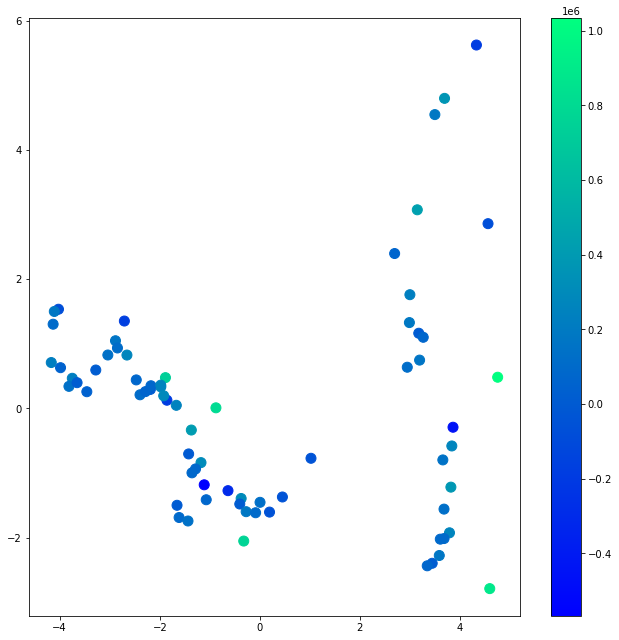

In [61]:
x = X_train_sc_pca[:, 0]
y = X_train_sc_pca[:, 1]
z = y_train
plt.figure(figsize=(11,11))
cm = plt.get_cmap('winter')
sc = plt.scatter(x, y, c=z, cmap=cm, s=100)
plt.colorbar(sc)
plt.show()

In [62]:
#Было принято решение почистить датасет от выбросов спомощью DBSCAN

In [63]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_ss = scaler.transform(X_train)
dbscan = DBSCAN(eps=5.5)
new = dbscan.fit_predict(X_train_ss)
X_train['metka']=new
y_train = pd.DataFrame(y_train)
y_train['metka']=new
X_train = X_train.loc[X_train['metka'] != -1]
y_train = y_train.loc[y_train['metka'] != -1]
X_train = X_train.drop('metka', axis=1)
y_train = y_train.drop('metka', axis=1)
X_train

,Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",...,month_10,month_11,month_12,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017
0,5.244667,7.75,2.90,4.50,96.29,106.17151,5532900.0,19307.7,30.08,20669,...,0,0,0,1,0,0,0,0,0,0
1,5.144211,8.00,3.10,4.40,103.96,106.99964,5613700.0,19536.7,29.29,20680,...,0,0,0,1,0,0,0,0,0,0
2,5.021364,8.00,3.10,4.20,114.44,107.66304,5647000.0,19788.7,28.43,22673,...,0,0,0,1,0,0,0,0,0,0
3,4.558571,8.00,2.60,4.10,123.15,108.12599,5863400.0,20020.8,28.10,22519,...,0,0,0,1,0,0,0,0,0,0
4,4.795000,8.25,2.60,4.10,114.46,108.64500,5893400.0,20160.9,27.87,22779,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,9.274348,10.50,0.89,6.77,46.14,163.04897,8517600.0,36169.6,64.92,35405,...,0,0,0,0,0,0,0,0,1,0
68,9.015000,10.00,0.82,6.00,46.19,163.32615,8557800.0,36148.8,64.60,35843,...,0,0,0,0,0,0,0,0,1,0
69,9.002381,10.00,0.71,6.01,49.73,164.02846,8459500.0,36051.0,62.68,35749,...,1,0,0,0,0,0,0,0,1,0
70,8.936190,10.00,0.72,6.62,46.44,164.75018,8425200.0,36433.0,64.36,36195,...,0,1,0,0,0,0,0,0,1,0


In [64]:
y_train

,Прирост вкладов физических лиц в рублях (млн руб)
0,-79049.0
1,180475.0
2,106845.0
3,224890.0
4,45856.0
...,...
67,92168.0
68,20272.0
69,72037.0
70,172323.0


In [65]:
#В качестве метрики была выбрана mean absolute error, хорошо интерпретируемая метрика, измеряющая среднюю сумму абсолютной
#разницы между фактическим значением и прогнозируемым значением.

In [66]:
#Поиск оптимальных моделей без настройки гиперпараметров под метрику mean absolute error. Поскольку большинство моделей нуждается в 
#нормализации данных, перед передачей данных в модель их необходимо стандартизировать. Для оценки качества работы моделей
#воспользуемся cross_val_score.

In [67]:
rg=Ridge()
dt=DecisionTreeRegressor(random_state=42)
rf=RandomForestRegressor(random_state=42)
knn=KNeighborsRegressor()
xgb=XGBRegressor(random_state=42)
svr=SVR()
mlp=MLPRegressor(random_state=42)
alg=[rg,dt,rf,knn,xgb,svr,mlp]

In [68]:
for i in alg:
    pipe = Pipeline([('SS', StandardScaler()), ('Regressor', i)])
    print(i)
    print(np.mean(cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')))

Ridge()
-88090.83298685667
DecisionTreeRegressor(random_state=42)
-93874.67142857143
RandomForestRegressor(random_state=42)
-90470.0771098901
KNeighborsRegressor()
-125207.8501098901
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=42, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
-86977.18299278847
SVR()
-152987.17602886222
MLPRegressor(random_state=42)
-194305.428991415


In [69]:
#Лучшие результаты показал метод градиентного бустинга, используем его как основную модель и настроим гиперпараметры.

In [70]:
pipe2 = Pipeline([('SS', StandardScaler()), ('regressor', XGBRegressor(random_state=42, n_estimators=100))])
param_grid2 = [
    {'regressor__max_depth': [1, 2, 3, 4, 5, 6],
     'regressor__learning_rate': [0.01, 0.1, 1, 10, 100]     
     }
]

grid = GridSearchCV(pipe2, param_grid2, cv=5, scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('SS', StandardScaler()),
                                       ('regressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     gamma=None, gpu_id=None,
                                                     importance_type='gain',
                                                     interaction_constraints=None,
                                                     learning_rate=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                           

In [71]:
grid.best_params_

{'regressor__learning_rate': 0.1, 'regressor__max_depth': 2}

In [72]:
grid.best_score_

-83083.58467118819

In [73]:
#Получение прогноза на 01.2017 – 12.2017.

In [74]:
y_pred = grid.predict(X_test)
y_pred

array([-249099.5 ,  262222.3 ,  208392.4 ,  436750.34,  175267.33,
        288100.56,  221361.86,  242376.23,  138686.17,  220054.7 ,
        168673.3 ,  716399.1 ], dtype=float32)

In [75]:
df_copy['Прирост вкладов физических лиц в рублях (млн руб)'].iloc[72:] = y_pred
df_copy

,Unnamed: 0,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",Unnamed: 12,Unnamed: 13,Unnamed: 14
0,2011-01-01,-79049.000000,5.244667,7.75,2.90,4.50,96.29,106.171510,5.532900e+06,19307.700000,30.08,20669,NaN,NaN,NaN
1,2011-02-01,180475.000000,5.144211,8.00,3.10,4.40,103.96,106.999640,5.613700e+06,19536.700000,29.29,20680,NaN,NaN,NaN
2,2011-03-01,106845.000000,5.021364,8.00,3.10,4.20,114.44,107.663040,5.647000e+06,19788.700000,28.43,22673,NaN,NaN,NaN
3,2011-04-01,224890.000000,4.558571,8.00,2.60,4.10,123.15,108.125990,5.863400e+06,20020.800000,28.10,22519,NaN,NaN,NaN
4,2011-05-01,45856.000000,4.795000,8.25,2.60,4.10,114.46,108.645000,5.893400e+06,20160.900000,27.87,22779,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2017-08-01,242376.234375,7.882174,9.00,0.73,6.07,52.00,168.418880,9.194600e+06,39419.300000,59.65,37099,NaN,NaN,NaN
80,2017-09-01,138686.171875,7.648095,8.50,0.66,5.31,57.00,168.166250,9.225200e+06,39571.000000,57.73,38047,NaN,NaN,NaN
81,2017-10-01,220054.703125,7.503636,8.25,0.61,5.67,57.50,168.502590,9.246600e+06,39565.982237,57.71,38333,NaN,NaN,NaN
82,2017-11-01,168673.296875,7.381429,8.25,0.64,5.18,63.10,168.852459,9.281212e+06,40101.582544,58.92,38848,NaN,NaN,NaN


In [76]:
df_copy.set_index('Unnamed: 0', inplace=True)
df_copy

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб",Unnamed: 12,Unnamed: 13,Unnamed: 14
Unnamed: 0,,,,,,,,,,,,,,
2011-01-01,-79049.000000,5.244667,7.75,2.90,4.50,96.29,106.171510,5.532900e+06,19307.700000,30.08,20669,NaN,NaN,NaN
2011-02-01,180475.000000,5.144211,8.00,3.10,4.40,103.96,106.999640,5.613700e+06,19536.700000,29.29,20680,NaN,NaN,NaN
2011-03-01,106845.000000,5.021364,8.00,3.10,4.20,114.44,107.663040,5.647000e+06,19788.700000,28.43,22673,NaN,NaN,NaN
2011-04-01,224890.000000,4.558571,8.00,2.60,4.10,123.15,108.125990,5.863400e+06,20020.800000,28.10,22519,NaN,NaN,NaN
2011-05-01,45856.000000,4.795000,8.25,2.60,4.10,114.46,108.645000,5.893400e+06,20160.900000,27.87,22779,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-01,242376.234375,7.882174,9.00,0.73,6.07,52.00,168.418880,9.194600e+06,39419.300000,59.65,37099,NaN,NaN,NaN
2017-09-01,138686.171875,7.648095,8.50,0.66,5.31,57.00,168.166250,9.225200e+06,39571.000000,57.73,38047,NaN,NaN,NaN
2017-10-01,220054.703125,7.503636,8.25,0.61,5.67,57.50,168.502590,9.246600e+06,39565.982237,57.71,38333,NaN,NaN,NaN


In [77]:
df_copy.to_excel("D:/answer.xlsx", header=True, index=True)

In [78]:
#В результате была получена модель способная предсказывать прирост вкладов физических лиц в рублях (млн руб) с метрикой MAE = 
#83083.58467118819